# Telecom Churn Assignment

In [372]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [335]:
churn = pd.read_csv('telecom_churn_data.csv')
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


--------------------------------------------------------------------------------------------------------------------------------
## 1. Data validation

In [336]:
churn.dtypes

mobile_number       int64
circle_id           int64
loc_og_t2o_mou    float64
std_og_t2o_mou    float64
loc_ic_t2o_mou    float64
                   ...   
aon                 int64
aug_vbc_3g        float64
jul_vbc_3g        float64
jun_vbc_3g        float64
sep_vbc_3g        float64
Length: 226, dtype: object

In [337]:
churn.shape

(99999, 226)

In [338]:
churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [339]:
#Dropping last_date columns as they contain redundant data
churn = churn.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9',
                   'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9',
                    'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8',
                    'date_of_last_rech_data_9'], axis=1)

--------------------------------------------------------------------------------------------------------------------------------
## 2. Data Preparation

#### a. Filtering high-value customers
Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase)

In [340]:
all_columns = churn.columns.to_list()

In [341]:
[col for col in all_columns if 'rech' in col]

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_num_9',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_amt_9',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'max_rech_amt_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [342]:
churn['final_rech_amt_6'] = churn['av_rech_amt_data_6'] * churn['total_rech_data_6']
churn['final_rech_amt_7'] = churn['av_rech_amt_data_7'] * churn['total_rech_data_7']
churn['final_rech_amt_8'] = churn['av_rech_amt_data_8'] * churn['total_rech_data_8']
churn['final_rech_amt_9'] = churn['av_rech_amt_data_9'] * churn['total_rech_data_9']

In [343]:
#Average recharge amt for good phase:
good_phase_avg = (churn['total_rech_amt_6'].fillna(0) + churn['total_rech_amt_7'].fillna(0) +
                churn['final_rech_amt_6'].fillna(0) + churn['final_rech_amt_7'].fillna(0))/2
good_phase_avg

0         559.0
1         306.0
2         241.5
3         270.0
4         301.0
          ...  
99994      85.0
99995     110.0
99996      98.5
99997    1602.0
99998     432.0
Length: 99999, dtype: float64

In [344]:
#70 percentile of good phase recharge amount:
good_phase_70per = np.percentile(good_phase_avg,70.0)
good_phase_70per

478.0

In [345]:
#Keeping only records where recharge amount is 70 percentile of good phase avg amount:
churn = churn[good_phase_avg >= good_phase_70per]
churn.shape

(30001, 218)

#### b. Tag churners and remove attributes of the churn phase
Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.

In [346]:
month9 = [col for col in all_columns if '9' in col]

oc_cols = [col for col in month9 if 'oc' in col and 'mou' in col]

ic_cols = [col for col in month9 if 'ic'in col and 'mou' in col]

vol_cols = [col for col in month9 if 'vol' in col and 'mb' in col]

In [347]:
#Sum of all ic_cols
churn['ic_sums'] = churn[ic_cols].sum(axis=1)
#Sum of all oc_cols
churn['oc_sums'] = churn[oc_cols].sum(axis=1)
#Sum of all vol_cols
churn['vol_sums'] = churn[vol_cols].sum(axis=1)

In [349]:
churn_cols = ['ic_sums','oc_sums','vol_sums']
churn['churn'] = churn[churn_cols].sum(axis=1)
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,jun_vbc_3g,sep_vbc_3g,final_rech_amt_6,final_rech_amt_7,final_rech_amt_8,final_rech_amt_9,ic_sums,oc_sums,vol_sums,churn
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,...,101.20,3.58,252.0,252.0,252.0,NaN,0.00,0.00,0.00,0.00
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,...,18.74,0.00,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,...,122.16,0.00,NaN,354.0,207.0,NaN,104.72,164.17,0.00,268.89
21,7002124215,109,0.0,0.0,0.0,514.453,597.753,637.760,578.596,102.41,...,0.00,0.00,NaN,NaN,NaN,NaN,757.80,554.79,0.00,1312.59
23,7000887461,109,0.0,0.0,0.0,74.350,193.897,366.966,811.480,48.96,...,0.00,0.00,NaN,712.0,540.0,252.0,382.42,450.31,328.67,1161.40


In [350]:
#Creating correct data for churn column:
churn['churn'] = churn['churn'].apply(lambda x:0 if x>0 else 1)
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,jun_vbc_3g,sep_vbc_3g,final_rech_amt_6,final_rech_amt_7,final_rech_amt_8,final_rech_amt_9,ic_sums,oc_sums,vol_sums,churn
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,...,101.20,3.58,252.0,252.0,252.0,NaN,0.00,0.00,0.00,1
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,...,18.74,0.00,NaN,NaN,NaN,NaN,0.00,0.00,0.00,1
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,...,122.16,0.00,NaN,354.0,207.0,NaN,104.72,164.17,0.00,0
21,7002124215,109,0.0,0.0,0.0,514.453,597.753,637.760,578.596,102.41,...,0.00,0.00,NaN,NaN,NaN,NaN,757.80,554.79,0.00,0
23,7000887461,109,0.0,0.0,0.0,74.350,193.897,366.966,811.480,48.96,...,0.00,0.00,NaN,712.0,540.0,252.0,382.42,450.31,328.67,0


In [351]:
churn['churn'].value_counts(normalize=True)

0    0.942369
1    0.057631
Name: churn, dtype: float64

In [352]:
#Droppinng columns for 9th month:
churn = churn.drop([col for col in month9 + churn_cols if col not in ['total_rech_data_9','av_rech_amt_data_9']],axis=1)
churn.shape

(30001, 170)

--------------------------------------------------------------------------------------------------------------------------------
## 3. Data cleaning and performing EDA
- Removing null columns/rows
- Averaging out data in 6th and 7th months and create new values
- Performing EDA on the given data
- Checking and dealing with outliers using Scaling techniques

In [353]:
#Calculating percent of null values in columns
nullvals = round(churn.isna().sum() / len(churn) * 100, 2).sort_values(ascending=False)
nullvals

total_rech_data_9     49.27
final_rech_amt_9      49.27
av_rech_amt_data_9    49.27
fb_user_8             46.83
max_rech_data_8       46.83
                      ...  
vol_2g_mb_6            0.00
vol_2g_mb_7            0.00
vol_2g_mb_8            0.00
vol_3g_mb_6            0.00
churn                  0.00
Length: 170, dtype: float64

In [354]:
drop = nullvals[nullvals > 40].index.tolist()
drop

['total_rech_data_9',
 'final_rech_amt_9',
 'av_rech_amt_data_9',
 'fb_user_8',
 'max_rech_data_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'total_rech_data_8',
 'night_pck_user_8',
 'av_rech_amt_data_8',
 'arpu_2g_8',
 'final_rech_amt_8',
 'arpu_3g_8',
 'night_pck_user_6',
 'av_rech_amt_data_6',
 'arpu_3g_6',
 'fb_user_6',
 'count_rech_3g_6',
 'final_rech_amt_6',
 'total_rech_data_6',
 'count_rech_2g_6',
 'max_rech_data_6',
 'arpu_2g_6',
 'arpu_2g_7',
 'fb_user_7',
 'total_rech_data_7',
 'max_rech_data_7',
 'count_rech_3g_7',
 'av_rech_amt_data_7',
 'arpu_3g_7',
 'night_pck_user_7',
 'count_rech_2g_7',
 'final_rech_amt_7']

In [355]:
churn = churn.drop(drop, axis=1)
churn.shape

(30001, 137)

In [356]:
round(churn.isna().sum() / len(churn) * 100, 2).sort_values(ascending=False)

loc_og_t2t_mou_8      3.91
roam_og_mou_8         3.91
std_og_t2c_mou_8      3.91
loc_ic_mou_8          3.91
loc_og_t2m_mou_8      3.91
                      ... 
max_rech_amt_6        0.00
max_rech_amt_7        0.00
max_rech_amt_8        0.00
last_day_rch_amt_6    0.00
churn                 0.00
Length: 137, dtype: float64

In [357]:
#Dropping null rows in rest of the columns:
for col in churn.columns:
    churn = churn[~churn[col].isna()]

In [358]:
round(churn.isna().sum() / len(churn) * 100, 2).sort_values(ascending=False)

mobile_number       0.0
spl_ic_mou_8        0.0
std_ic_mou_8        0.0
total_ic_mou_6      0.0
total_ic_mou_7      0.0
                   ... 
std_og_t2m_mou_8    0.0
std_og_t2m_mou_7    0.0
std_og_t2m_mou_6    0.0
std_og_t2t_mou_8    0.0
churn               0.0
Length: 137, dtype: float64

In [359]:
churn.shape

(28504, 137)

In [360]:
cols_w_unique_data = []

for col in churn.columns:
    if churn[f'{col}'].nunique() ==1:
        cols_w_unique_data.append(col)

cols_w_unique_data

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [363]:
churn = churn.drop(cols_w_unique_data, axis=1)
churn.shape

(28504, 127)

In [364]:
churn = churn.drop('mobile_number',axis=1)
churn.shape

(28504, 126)

In [365]:
#Checking correlation between columns:
corr = churn.corr()
corr.loc[:, :] = np.tril(corr, -1)
corr = corr.stack()
high_corr_value = corr[(corr > 0.60) | (corr < -0.60)]
high_corr_value

arpu_7       arpu_6         0.717481
arpu_8       arpu_6         0.663516
             arpu_7         0.769991
onnet_mou_7  onnet_mou_6    0.767866
onnet_mou_8  onnet_mou_6    0.643202
                              ...   
aug_vbc_3g   vol_3g_mb_8    0.620257
jul_vbc_3g   vol_3g_mb_7    0.651460
             aug_vbc_3g     0.705569
jun_vbc_3g   vol_3g_mb_6    0.662753
             jul_vbc_3g     0.680213
Length: 206, dtype: float64

In [366]:
drop_col_corr = ['loc_og_t2m_mou_6', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 
                 'std_og_t2m_mou_7','std_og_t2m_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
                 'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7',
                 'loc_ic_t2m_mou_8', 'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8', 'total_ic_mou_6',
                 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8', 'vol_3g_mb_6',
                 'vol_3g_mb_7', 'vol_3g_mb_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2f_mou_6',
                 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7','loc_og_t2m_mou_8',
                 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8']

churn = churn.drop(drop_col_corr, axis=1)
churn.shape

(28504, 87)

Deriving new columns from existing ones.

In [367]:
# Create a total mou instead of offnet and onnet

churn['total_mou_6'] = churn['onnet_mou_6'] + churn['offnet_mou_6']
churn['total_mou_7'] = churn['onnet_mou_7'] + churn['offnet_mou_7']
churn['total_mou_8'] = churn['onnet_mou_8'] + churn['offnet_mou_8']

# Dropping the redundant columns
churn = churn.drop(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], axis=1)

churn.head()

,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2c_mou_6,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_mou_6,total_mou_7,total_mou_8
7,1069.180,1349.850,3171.480,16.23,33.49,31.64,23.74,12.59,38.06,0.0,...,0,802,57.74,19.38,18.74,0.0,1,511.27,621.84,378.20
8,378.721,492.223,137.362,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0,315,21.03,910.65,122.16,0.0,0,508.35,431.66,171.56
21,514.453,597.753,637.760,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0,720,0.00,0.00,0.00,0.0,0,860.34,1028.79,1068.53
23,74.350,193.897,366.966,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,1,604,40.45,51.86,0.00,0.0,0,134.37,140.02,239.47
33,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.0,...,0,1328,358.10,2706.83,1714.67,0.0,0,0.00,0.00,0.00


In [368]:
#Averaging columns for 6th and 7th month
col_for_6_7 = [col[:-2] for col in churn.columns if '6' in col or '7' in col]

#Create new feature and drop the redundant columns
for col in set(col_for_6_7):
    churn[f'gd_ph_{col}'] = ( churn[f'{col}_6'] + churn[f'{col}_7'] ) / 2
    churn.drop([f'{col}_6', f'{col}_7'], axis=1, inplace=True)
        
churn.head()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,...,gd_ph_total_rech_num,gd_ph_og_others,gd_ph_spl_og_mou,gd_ph_sachet_3g,gd_ph_sachet_2g,gd_ph_monthly_3g,gd_ph_roam_ic_mou,gd_ph_vol_2g_mb,gd_ph_std_ic_mou,gd_ph_std_og_t2f_mou
7,3171.480,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,...,5.0,0.0,2.25,0.0,0.0,0.0,24.86,0.000,176.810,13.37
8,137.362,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,...,20.0,0.0,0.00,0.0,0.5,0.0,0.00,178.000,13.545,0.00
21,637.760,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,...,24.0,0.0,0.00,0.0,0.0,0.0,0.00,0.000,62.985,0.00
23,366.966,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,...,4.0,0.0,0.05,0.0,0.0,1.0,0.00,0.240,8.915,0.00
33,409.230,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.56,0.0,...,10.5,0.0,0.00,2.0,0.0,4.5,0.00,72.405,4.420,0.00


In [369]:
# Create new column for vbc as well
churn['gd_ph_vbc_3g'] = ( churn['jul_vbc_3g'] + churn['jun_vbc_3g'] ) / 2

# Drop redundant column
churn.drop(['jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'], axis=1, inplace=True)

# Rename the august column for vbc to vbc_3g_8
churn['vbc_3g_8'] = churn['aug_vbc_3g']
churn.drop('aug_vbc_3g', axis=1, inplace=True)

churn.head()

,arpu_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,...,gd_ph_spl_og_mou,gd_ph_sachet_3g,gd_ph_sachet_2g,gd_ph_monthly_3g,gd_ph_roam_ic_mou,gd_ph_vol_2g_mb,gd_ph_std_ic_mou,gd_ph_std_og_t2f_mou,gd_ph_vbc_3g,vbc_3g_8
7,3171.480,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,...,2.25,0.0,0.0,0.0,24.86,0.000,176.810,13.37,19.060,57.74
8,137.362,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,...,0.00,0.0,0.5,0.0,0.00,178.000,13.545,0.00,516.405,21.03
21,637.760,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,...,0.00,0.0,0.0,0.0,0.00,0.000,62.985,0.00,0.000,0.00
23,366.966,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,...,0.05,0.0,0.0,1.0,0.00,0.240,8.915,0.00,25.930,40.45
33,409.230,0.00,0.00,0.56,0.00,0.00,0.00,0.00,0.56,0.0,...,0.00,2.0,0.0,4.5,0.00,72.405,4.420,0.00,2210.750,358.10


Removing outliers and performing EDA

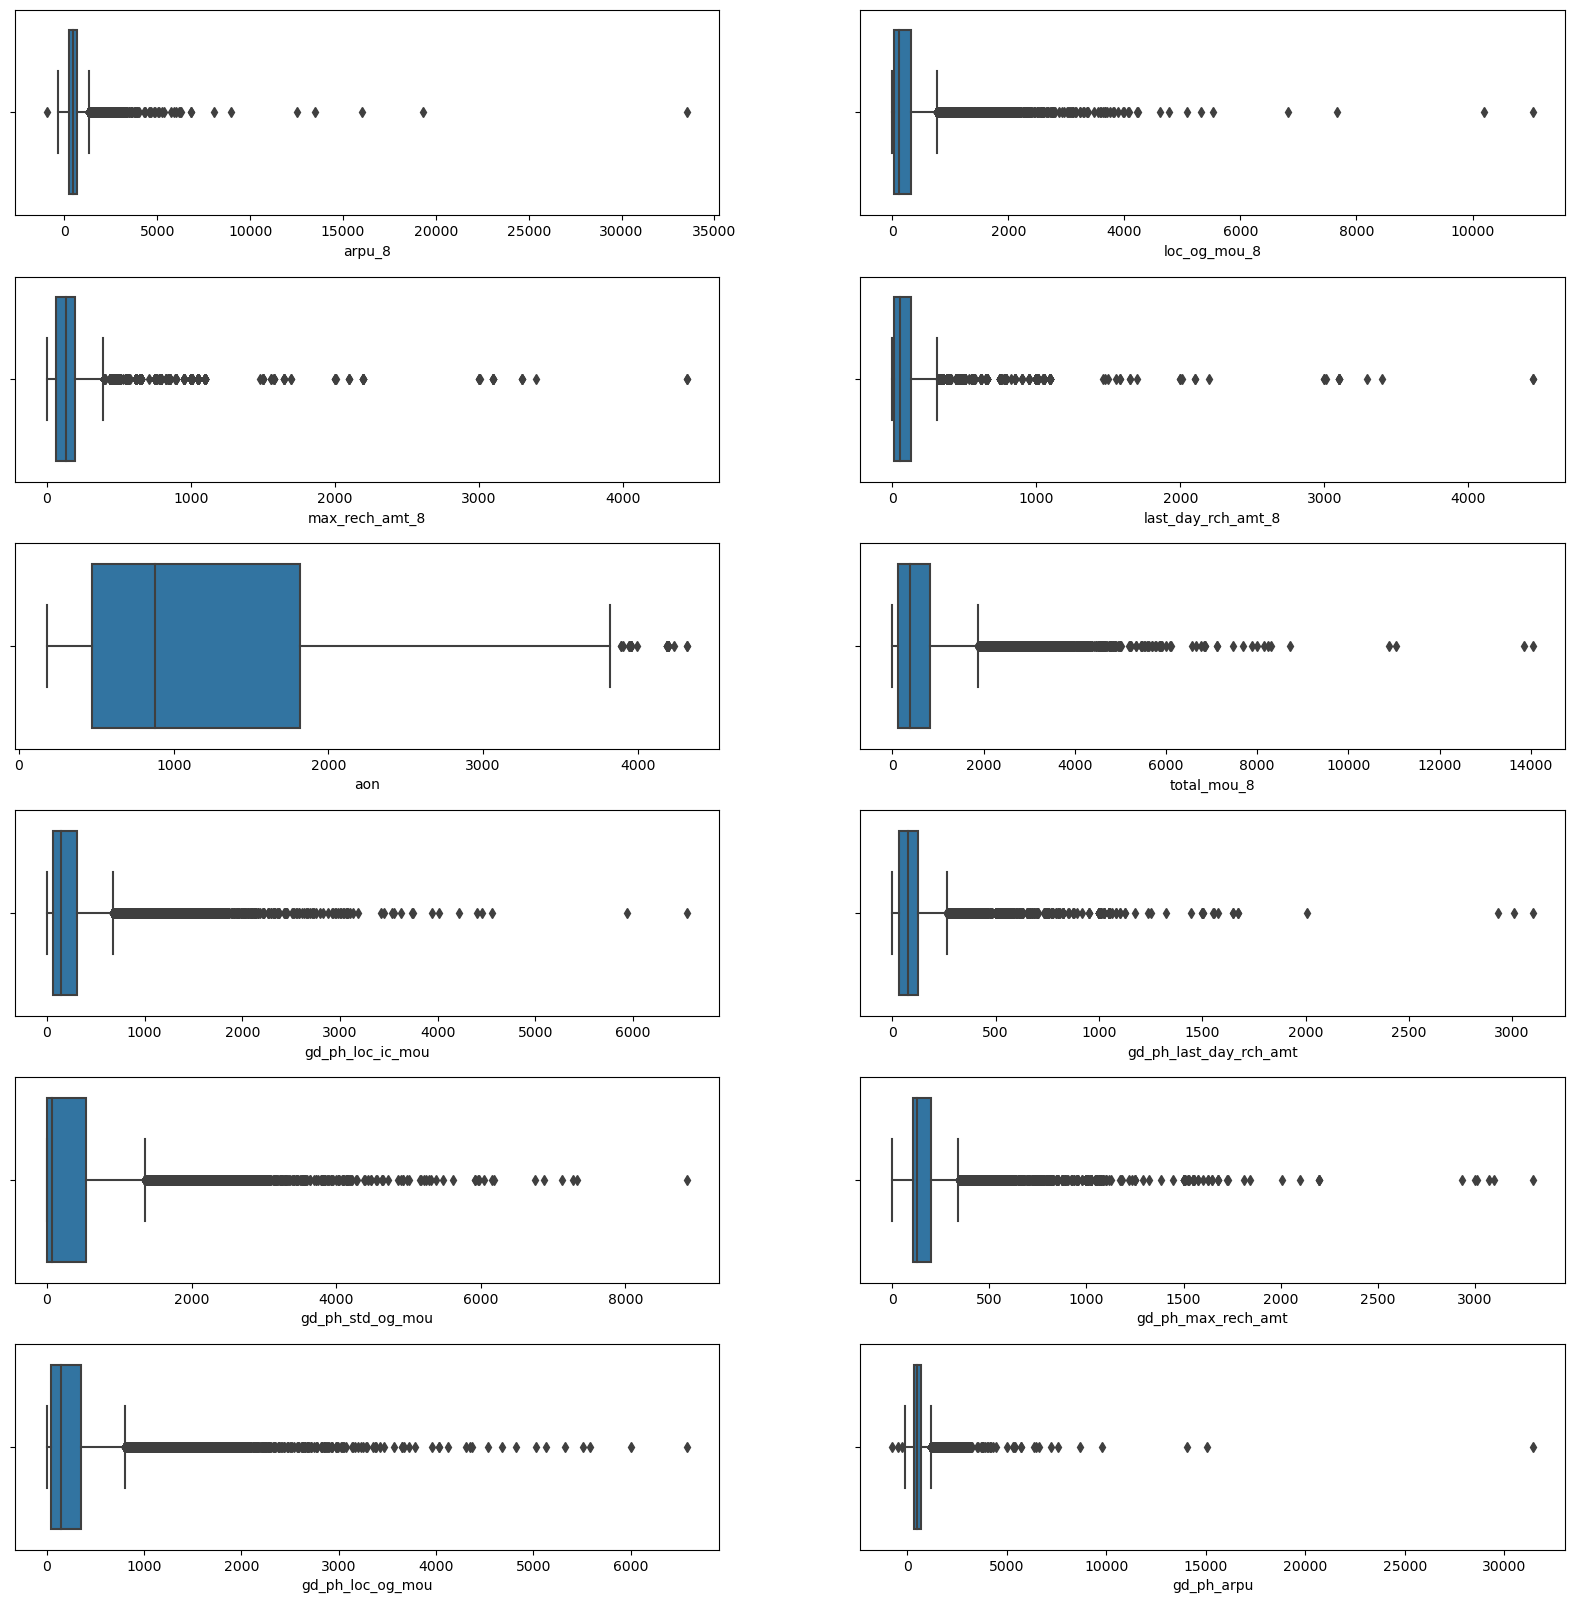

In [386]:
col_boxplot = ['arpu_8', 'loc_og_mou_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'aon', 'total_mou_8', 'gd_ph_loc_ic_mou', 
               'gd_ph_last_day_rch_amt', 'gd_ph_std_og_mou', 'gd_ph_max_rech_amt','gd_ph_loc_og_mou', 'gd_ph_arpu']

# Plot boxplots for each variable
fig, axes = plt.subplots(6, 2, figsize=(20, 20))

for index, col in enumerate(col_boxplot):
    i, j = divmod(index, 2)
    sns.boxplot(x=churn[col], ax=axes[i, j])
    
plt.subplots_adjust(hspace=0.3) 
plt.show()

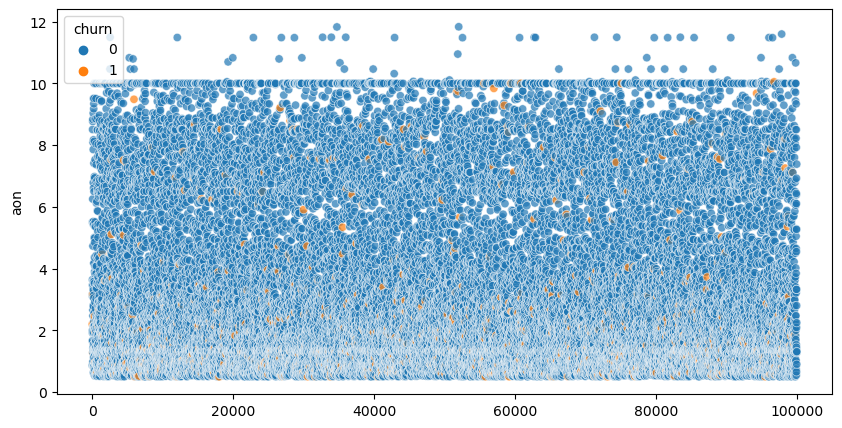

In [379]:
plt.figure(figsize=[10,5])
sns.scatterplot(y=churn.aon/365,x=churn.index, hue=churn.churn,alpha=0.7)
plt.show()

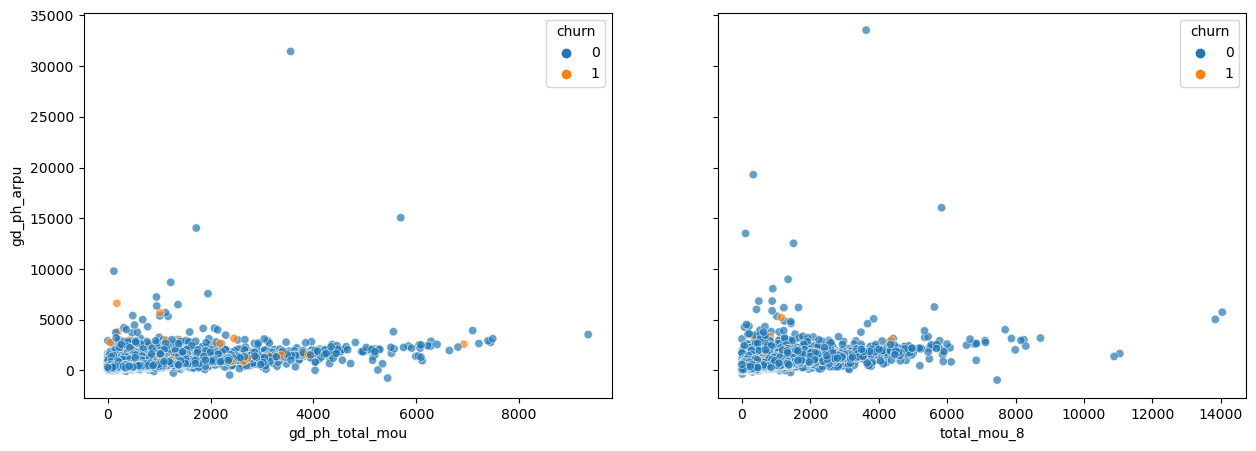

In [380]:
# Checking how the VBC effects the revenue
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))

sns.scatterplot(y='gd_ph_arpu', x='gd_ph_total_mou', data=churn, ax=axes[0], hue='churn', alpha=0.7)
sns.scatterplot(y='arpu_8', x='total_mou_8', data=churn, ax=axes[1], hue='churn', alpha=0.7)

plt.show()

MOU have dropped significantly for the churners in the 8th month, thus hitting the revenue generated from them.
Also as the MOU was average, but the revenue was high meaning other service was boosting in the 8th month.

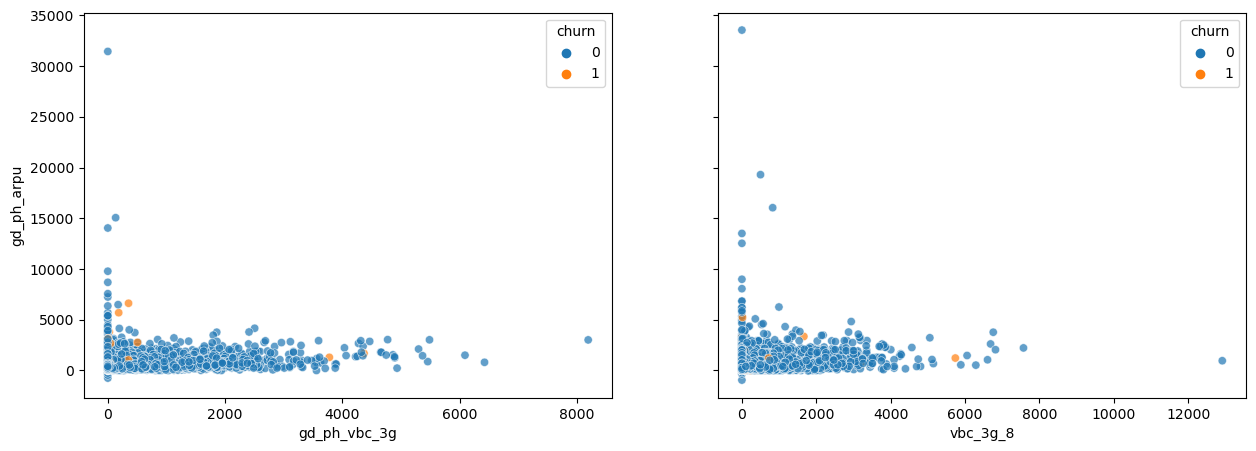

In [381]:
#total_mou affecting the revenue
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))

sns.scatterplot(y='gd_ph_arpu', x='gd_ph_vbc_3g', data=churn, ax=axes[0], hue='churn', alpha=0.7)
sns.scatterplot(y='arpu_8', x='vbc_3g_8', data=churn, ax=axes[1], hue='churn', alpha=0.7)

plt.show()

We can see that the users who were using very less amount of VBC data and yet were generating high revenue churned.

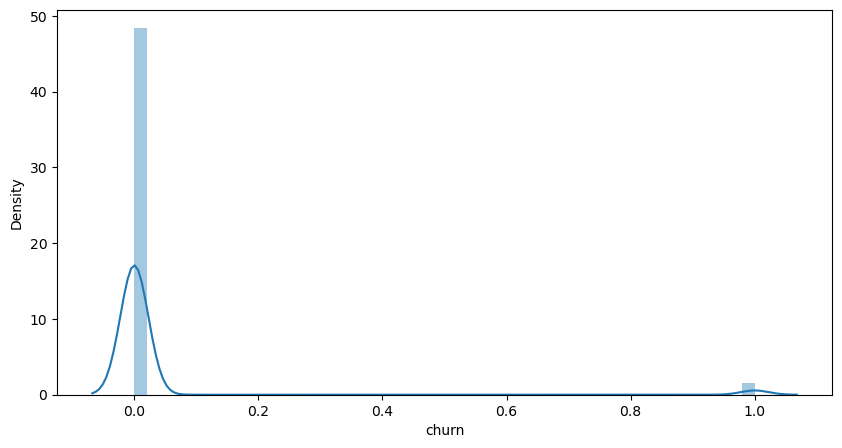

In [382]:
plt.figure(figsize=[10,5])

sns.distplot(churn['churn'])

plt.show()

As the number of non-churners in the dataset is around 94%, this will be handled using SMOTE algorithm.

In [387]:
y = churn['churn']
X = churn.drop('churn', axis=1)

##### Standardizing data

In [388]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

In [389]:
churn.churn.value_counts()

0    27594
1      910
Name: churn, dtype: int64

SMOTE algorithm to handle class imbalance

In [390]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [391]:
y_res.value_counts()

1    27594
0    27594
Name: churn, dtype: int64

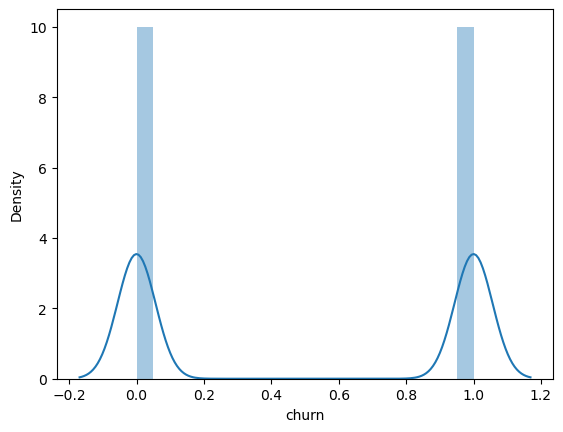

In [392]:
sns.distplot(y_res)
plt.show()

###### PCA

In [393]:
X.shape

(28504, 55)

In [394]:
from sklearn.decomposition import PCA

pca = PCA(n_components=25)
X_pca = pca.fit_transform(X_res)
X_pca.shape

(55188, 25)

--------------------------------------------------------------------------------------------------------------------------------
## 4. Model Building 
1. Logistic regression
2. Decision Tree
3. Random Forest

### 1. Logistic Regression
For logistic regression we will be using the unaltered X and y so that we can use RFE for feature selection instead of PCA, to find out the strong predictor of churn

In [395]:
# Splitting the data into train and test
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, train_size=0.7, test_size=0.3, random_state=25)

In [396]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38631
Model:                            GLM   Df Residuals:                    38575
Model Family:                Binomial   Df Model:                           55
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17791.
Date:                Mon, 13 May 2024   Deviance:                       35582.
Time:                        21:27:33   Pearson chi2:                 3.04e+06
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3720
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.4247      0.022    -64.126      0.000      -1.468      -1.381
arpu_8                     0.2479      0.052      4.751      0.000       0.146       0.350
roam_ic_mou_8             -0.4024      0.034    -11.965      0.000      -0.468      -0.336
roam_og_mou_8              1.1078      0.275      4.030      0.000       0.569       1.647
loc_og_t2c_mou_8           0.0547      0.024      2.280      0.023       0.008       0.102
loc_og_mou_8               3.2519      0.942      3.451      0.001       1.405       5.099
std_og_t2f_mou_8          -0.0663      0.036     -1.844      0.065      -0.137       0.004
std_og_mou_8               5.8824      1.571      3.745      0.000       2.804       8.961
isd_og_mou_8               0.1242      0.116      1.071      0.284      -0.103       0.351
spl_og_mou_8               0.0113      0.052      0.220      0.826      -0.090       0.112
og_others_8                0.1566      0.030      5.288      0.000       0.099       0.215
loc_ic_mou_8              -1.6443      0.057    -28.708      0.000      -1.757      -1.532
std_ic_t2t_mou_8          -0.6069      0.067     -9.091      0.000      -0.738      -0.476
std_ic_t2f_mou_8          -0.0755      0.048     -1.561      0.118      -0.170       0.019
std_ic_mou_8              -0.1346      0.045     -3.016      0.003      -0.222      -0.047
spl_ic_mou_8              -0.2740      0.022    -12.381      0.000      -0.317      -0.231
isd_ic_mou_8              -0.1404      0.030     -4.759      0.000      -0.198      -0.083
ic_others_8                0.1659      0.032      5.239      0.000       0.104       0.228
total_rech_num_8          -0.4280      0.033    -12.819      0.000      -0.493      -0.363
max_rech_amt_8             0.2531      0.025     10.049      0.000       0.204       0.302
last_day_rch_amt_8        -0.5661      0.024    -23.630      0.000      -0.613      -0.519
vol_2g_mb_8               -0.3575      0.032    -11.234      0.000      -0.420      -0.295
monthly_2g_8              -0.5465      0.028    -19.503      0.000      -0.601      -0.492
sachet_2g_8               -0.5546      0.030    -18.387      0.000      -0.614      -0.495
monthly_3g_8              -0.8591      0.038    -22.500      0.000      -0.934      -0.784
sachet_3g_8               -0.3805      0.037    -10.256      0.000      -0.453      -0.308
aon                       -0.3895      0.016    -23.972      0.000      -0.421      -0.358
total_mou_8               -7.5692      1.808     -4.187      0.000     -11.112      -4.026
gd_ph_arpu                -0.1010      0.046     -2.215      0.027      -0.190      -0.012
gd_ph_loc_og_mou           2.2047      1.086      2.030      0.042       0.076       4.334
gd_ph_spl_ic_mou          -0.0427      0.024     -1.794      0.073      -0.089  

RFE for feature selection

In [398]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression(solver='liblinear')

# Running RFE for 25 features
rfe = RFE(logreg, n_features_to_select=25)
rfe = rfe.fit(X_train, y_train)

In [399]:
rfe_col = X.columns[rfe.support_]
rfe_col

Index(['arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_mou_8',
       'std_og_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aon',
       'total_mou_8', 'gd_ph_total_mou', 'gd_ph_ic_others',
       'gd_ph_std_ic_t2t_mou', 'gd_ph_loc_ic_mou', 'gd_ph_total_rech_num',
       'gd_ph_monthly_3g', 'gd_ph_vol_2g_mb', 'vbc_3g_8'],
      dtype='object')

In [400]:
#Building model with RFE selected features
X_train_sm = sm.add_constant(X_train[rfe_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38631
Model:                            GLM   Df Residuals:                    38605
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18067.
Date:                Mon, 13 May 2024   Deviance:                       36134.
Time:                        21:28:43   Pearson chi2:                 5.09e+06
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3630
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3625      0.022    -63.346      0.000      -1.405      -1.320
arpu_8                   0.2658      0.036      7.448      0.000       0.196       0.336
roam_ic_mou_8           -0.3396      0.028    -12.055      0.000      -0.395      -0.284
roam_og_mou_8            0.4507      0.073      6.183      0.000       0.308       0.594
loc_og_mou_8             0.9870      0.246      4.008      0.000       0.504       1.470
std_og_mou_8             1.8349      0.410      4.472      0.000       1.031       2.639
loc_ic_mou_8            -1.6912      0.054    -31.103      0.000      -1.798      -1.585
std_ic_t2t_mou_8        -0.6836      0.060    -11.459      0.000      -0.801      -0.567
spl_ic_mou_8            -0.2851      0.022    -12.990      0.000      -0.328      -0.242
total_rech_num_8        -0.5515      0.032    -17.455      0.000      -0.613      -0.490
max_rech_amt_8           0.2973      0.023     12.941      0.000       0.252       0.342
last_day_rch_amt_8      -0.5823      0.024    -24.686      0.000      -0.629      -0.536
vol_2g_mb_8             -0.3605      0.032    -11.347      0.000      -0.423      -0.298
monthly_2g_8            -0.6199      0.025    -24.401      0.000      -0.670      -0.570
sachet_2g_8             -0.4647      0.023    -20.143      0.000      -0.510      -0.420
monthly_3g_8            -0.8595      0.037    -23.496      0.000      -0.931      -0.788
aon                     -0.3871      0.016    -24.505      0.000      -0.418      -0.356
total_mou_8             -2.9306      0.479     -6.123      0.000      -3.869      -1.992
gd_ph_total_mou          0.3238      0.024     13.733      0.000       0.278       0.370
gd_ph_ic_others         -0.2528      0.052     -4.823      0.000      -0.356      -0.150
gd_ph_std_ic_t2t_mou     0.2078      0.027      7.747      0.000       0.155       0.260
gd_ph_loc_ic_mou         0.8335      0.037     22.707      0.000       0.762       0.905
gd_ph_total_rech_num     0.3365      0.023     14.641      0.000       0.291       0.382
gd_ph_monthly_3g         0.2353      0.023     10.141      0.000       0.190       0.281
gd_ph_vol_2g_mb          0.2464      0.020     12.504      0.000       0.208       0.285
vbc_3g_8                -0.2283      0.028     -8.185      0.000      -0.283      -0.174
========================================================================================
"""

In [401]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,1,0.830131,1
1,0,0.048496,0
2,1,0.702357,1
3,0,0.122237,0
4,0,0.465566,0


In [402]:
from sklearn import metrics

#Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(f'Confusion Matrix: \n{confusion}')

#Overall accuracy.
print(f'\nAccuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

Confusion Matrix: 
[[14884  4427]
 [ 3446 15874]]

Accuracy : 0.7961999430509177


In [266]:
#Checking for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,total_mou_8,353.68
4,std_og_mou_8,234.86
3,loc_og_mou_8,82.16
17,gd_ph_total_mou,11.95
19,gd_ph_std_og_mou,11.54
2,roam_og_mou_8,8.69
0,arpu_8,3.79
5,loc_ic_mou_8,3.62
20,gd_ph_loc_ic_mou,3.19
8,total_rech_num_8,3.10


As the VIF for total_mou_8 is very high, we will drop the column

In [267]:
rfe_col = rfe_col.drop('total_mou_8', 1)

In [268]:
#Building new model
X_train_sm = sm.add_constant(X_train[rfe_col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38631
Model:                            GLM   Df Residuals:                    38606
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17994.
Date:                Sun, 12 May 2024   Deviance:                       35988.
Time:                        21:54:31   Pearson chi2:                 8.32e+07
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3654
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3826      0.022    -63.611      0.000      -1.425      -1.340
arpu_8                   0.1325      0.031      4.277      0.000       0.072       0.193
roam_ic_mou_8           -0.3151      0.028    -11.440      0.000      -0.369      -0.261
roam_og_mou_8            0.0070      0.021      0.334      0.739      -0.034       0.048
loc_og_mou_8            -0.6738      0.044    -15.303      0.000      -0.760      -0.588
std_og_mou_8            -0.6059      0.032    -19.084      0.000      -0.668      -0.544
loc_ic_mou_8            -1.6862      0.056    -30.276      0.000      -1.795      -1.577
std_ic_t2t_mou_8        -0.4231      0.045     -9.467      0.000      -0.511      -0.336
spl_ic_mou_8            -0.2885      0.022    -13.135      0.000      -0.332      -0.245
total_rech_num_8        -0.5221      0.031    -16.601      0.000      -0.584      -0.460
max_rech_amt_8           0.3149      0.023     13.575      0.000       0.269       0.360
last_day_rch_amt_8      -0.5979      0.024    -25.196      0.000      -0.644      -0.551
vol_2g_mb_8             -0.3554      0.032    -11.120      0.000      -0.418      -0.293
monthly_2g_8            -0.6300      0.026    -24.399      0.000      -0.681      -0.579
sachet_2g_8             -0.4937      0.024    -20.940      0.000      -0.540      -0.447
monthly_3g_8            -0.8362      0.037    -22.841      0.000      -0.908      -0.764
aon                     -0.3926      0.016    -24.609      0.000      -0.424      -0.361
gd_ph_total_mou          0.5626      0.054     10.336      0.000       0.456       0.669
gd_ph_ic_others         -0.2542      0.053     -4.792      0.000      -0.358      -0.150
gd_ph_std_og_mou        -0.2608      0.051     -5.118      0.000      -0.361      -0.161
gd_ph_loc_ic_mou         0.8288      0.038     21.717      0.000       0.754       0.904
gd_ph_total_rech_num     0.3315      0.023     14.425      0.000       0.286       0.377
gd_ph_monthly_3g         0.2446      0.023     10.476      0.000       0.199       0.290
gd_ph_vol_2g_mb          0.2458      0.020     12.345      0.000       0.207       0.285
vbc_3g_8                -0.2321      0.028     -8.247      0.000      -0.287      -0.177
========================================================================================
"""

In [269]:
# Prediction on train data
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,1,0.793239,1
1,0,0.061379,0
2,1,0.715895,1
3,0,0.319624,0
4,0,0.519644,1


In [273]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(f'Confusion Matrix: \n{confusion}')

#Overall accuracy.
print(f'\nAccuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

Confusion Matrix: 
[[14873  4438]
 [ 3375 15945]]

Accuracy : 0.7977530998420957


In [275]:
#Checking for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,gd_ph_total_mou,11.69
18,gd_ph_std_og_mou,11.36
5,loc_ic_mou_8,3.62
3,loc_og_mou_8,3.27
19,gd_ph_loc_ic_mou,3.18
8,total_rech_num_8,3.10
0,arpu_8,2.71
4,std_og_mou_8,2.62
9,max_rech_amt_8,2.53
20,gd_ph_total_rech_num,2.34


In [276]:
#Dropping 'gd_ph_total_mou'
rfe_col = rfe_col.drop('gd_ph_total_mou', 1)

In [277]:
#Building new model
X_train_sm = sm.add_constant(X_train[rfe_col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38631
Model:                            GLM   Df Residuals:                    38607
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18051.
Date:                Sun, 12 May 2024   Deviance:                       36102.
Time:                        22:00:50   Pearson chi2:                 2.97e+07
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3635
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3724      0.022    -63.440      0.000      -1.415      -1.330
arpu_8                   0.1563      0.029      5.417      0.000       0.100       0.213
roam_ic_mou_8           -0.3078      0.027    -11.427      0.000      -0.361      -0.255
roam_og_mou_8            0.0571      0.020      2.900      0.004       0.019       0.096
loc_og_mou_8            -0.3622      0.030    -12.211      0.000      -0.420      -0.304
std_og_mou_8            -0.6042      0.031    -19.219      0.000      -0.666      -0.543
loc_ic_mou_8            -1.7962      0.054    -33.223      0.000      -1.902      -1.690
std_ic_t2t_mou_8        -0.4236      0.045     -9.489      0.000      -0.511      -0.336
spl_ic_mou_8            -0.2898      0.022    -13.182      0.000      -0.333      -0.247
total_rech_num_8        -0.5889      0.031    -18.993      0.000      -0.650      -0.528
max_rech_amt_8           0.3151      0.023     13.793      0.000       0.270       0.360
last_day_rch_amt_8      -0.5965      0.024    -25.338      0.000      -0.643      -0.550
vol_2g_mb_8             -0.3515      0.032    -10.989      0.000      -0.414      -0.289
monthly_2g_8            -0.6422      0.026    -24.900      0.000      -0.693      -0.592
sachet_2g_8             -0.5046      0.024    -21.313      0.000      -0.551      -0.458
monthly_3g_8            -0.8472      0.037    -23.157      0.000      -0.919      -0.775
aon                     -0.3901      0.016    -24.568      0.000      -0.421      -0.359
gd_ph_ic_others         -0.2498      0.053     -4.740      0.000      -0.353      -0.147
gd_ph_std_og_mou         0.2129      0.022      9.850      0.000       0.171       0.255
gd_ph_loc_ic_mou         0.9419      0.036     25.956      0.000       0.871       1.013
gd_ph_total_rech_num     0.3906      0.023     17.329      0.000       0.346       0.435
gd_ph_monthly_3g         0.2421      0.023     10.387      0.000       0.196       0.288
gd_ph_vol_2g_mb          0.2338      0.020     11.792      0.000       0.195       0.273
vbc_3g_8                -0.2410      0.028     -8.544      0.000      -0.296      -0.186
========================================================================================
"""

In [278]:
#Prediction on train data
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,1,0.795241,1
1,0,0.063969,0
2,1,0.715473,1
3,0,0.306701,0
4,0,0.528638,1


In [279]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(f'Confusion Matrix: \n{confusion}')

#Overall accuracy.
print(f'\nAccuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

Confusion Matrix: 
[[14848  4463]
 [ 3432 15888]]

Accuracy : 0.7956304522274857


In [280]:
#Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,loc_ic_mou_8,3.43
8,total_rech_num_8,2.99
18,gd_ph_loc_ic_mou,2.84
0,arpu_8,2.67
4,std_og_mou_8,2.62
9,max_rech_amt_8,2.53
17,gd_ph_std_og_mou,2.27
19,gd_ph_total_rech_num,2.21
14,monthly_3g_8,2.06
10,last_day_rch_amt_8,2.02


In [281]:
# Dropping 'loc_ic_mou_8'
rfe_col = rfe_col.drop('loc_ic_mou_8', 1)

In [282]:
#Building new model
X_train_sm = sm.add_constant(X_train[rfe_col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38631
Model:                            GLM   Df Residuals:                    38608
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18796.
Date:                Sun, 12 May 2024   Deviance:                       37591.
Time:                        22:03:04   Pearson chi2:                 4.44e+07
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3385
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.1914      0.020    -60.291      0.000      -1.230      -1.153
arpu_8                   0.1063      0.029      3.690      0.000       0.050       0.163
roam_ic_mou_8           -0.2760      0.026    -10.473      0.000      -0.328      -0.224
roam_og_mou_8            0.0852      0.019      4.492      0.000       0.048       0.122
loc_og_mou_8            -0.7546      0.030    -25.037      0.000      -0.814      -0.695
std_og_mou_8            -0.6595      0.032    -20.827      0.000      -0.722      -0.597
std_ic_t2t_mou_8        -0.4966      0.046    -10.872      0.000      -0.586      -0.407
spl_ic_mou_8            -0.3126      0.022    -14.085      0.000      -0.356      -0.269
total_rech_num_8        -0.7752      0.031    -25.056      0.000      -0.836      -0.715
max_rech_amt_8           0.3000      0.022     13.629      0.000       0.257       0.343
last_day_rch_amt_8      -0.5881      0.023    -25.235      0.000      -0.634      -0.542
vol_2g_mb_8             -0.3808      0.032    -11.867      0.000      -0.444      -0.318
monthly_2g_8            -0.6695      0.025    -26.499      0.000      -0.719      -0.620
sachet_2g_8             -0.5262      0.024    -22.239      0.000      -0.573      -0.480
monthly_3g_8            -0.8556      0.036    -23.938      0.000      -0.926      -0.786
aon                     -0.4001      0.015    -26.099      0.000      -0.430      -0.370
gd_ph_ic_others         -0.1845      0.046     -4.055      0.000      -0.274      -0.095
gd_ph_std_og_mou         0.2567      0.022     11.888      0.000       0.214       0.299
gd_ph_loc_ic_mou        -0.0339      0.017     -1.977      0.048      -0.067      -0.000
gd_ph_total_rech_num     0.5208      0.022     23.361      0.000       0.477       0.564
gd_ph_monthly_3g         0.2395      0.023     10.569      0.000       0.195       0.284
gd_ph_vol_2g_mb          0.2218      0.019     11.501      0.000       0.184       0.260
vbc_3g_8                -0.2673      0.028     -9.616      0.000      -0.322      -0.213
========================================================================================
"""

In [283]:
# Prediction on train data
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted
0,1,0.766601,1
1,0,0.063014,0
2,1,0.712084,1
3,0,0.290782,0
4,0,0.424022,0


In [285]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(f'Confusion Matrix: \n{confusion}')

#Overall accuracy.
print(f'\nAccuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

Confusion Matrix: 
[[14641  4670]
 [ 3682 15638]]

Accuracy : 0.7838005746680128


In [286]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,total_rech_num_8,2.90
0,arpu_8,2.66
4,std_og_mou_8,2.62
8,max_rech_amt_8,2.53
16,gd_ph_std_og_mou,2.27
18,gd_ph_total_rech_num,2.14
13,monthly_3g_8,2.05
9,last_day_rch_amt_8,2.02
10,vol_2g_mb_8,1.82
19,gd_ph_monthly_3g,1.81


VIF values look good now, hence proceeding further

In [287]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [293]:
print(f'Sensitivity = {TP / float(TP+FN)}')
print(f'Specificity = {TN / float(TN+FP)}')
print(f'False Positive Rate = {FP/ float(TN+FP)}')
print(f'Positive Predicted Value = {TP / float(TP+FP)}')
print(f'Negative Predicted Value = {TN / float(TN+ FN)}')

Sensitivity = 0.8094202898550724
Specificity = 0.7581689192688105
False Positive Rate = 0.24183108073118947
Positive Predicted Value = 0.7700413630096513
Negative Predicted Value = 0.7990503738470774


Plotting ROC Curve

In [294]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

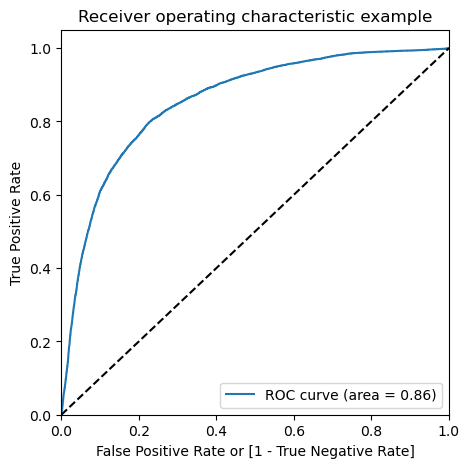

In [295]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

Optimal Cut-off point

In [296]:
#Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.766601,1,1,1,1,1,1,1,1,1,0,0
1,0,0.063014,0,1,0,0,0,0,0,0,0,0,0
2,1,0.712084,1,1,1,1,1,1,1,1,1,0,0
3,0,0.290782,0,1,1,1,0,0,0,0,0,0,0
4,0,0.424022,0,1,1,1,1,1,0,0,0,0,0


In [300]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5, 0.5, 0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500116  1.000000  0.000000
0.1   0.1  0.618312  0.985507  0.250945
0.2   0.2  0.686003  0.956004  0.415877
0.3   0.3  0.734902  0.917288  0.552431
0.4   0.4  0.764826  0.869565  0.660038
0.5   0.5  0.783801  0.809420  0.758169
0.6   0.6  0.777277  0.716874  0.837709
0.7   0.7  0.751728  0.600776  0.902750
0.8   0.8  0.675131  0.397308  0.953084
0.9   0.9  0.544174  0.100362  0.988193


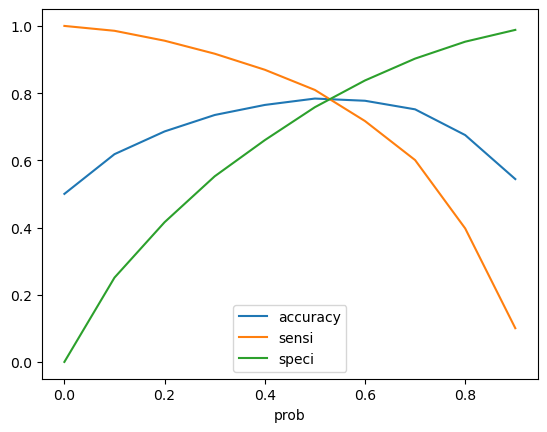

In [301]:
#Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

The point 0.5 is optimal for model

In [302]:
X_test = X_test[rfe_col]
X_test_sm = sm.add_constant(X_test)

# Predict on test data

y_test_pred = res.predict(X_test_sm)
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,predicted
5336,0,0.180561,0
29829,1,0.766564,1
55075,1,0.103617,0
27287,0,0.060257,0
17375,0,0.111226,0


In [304]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted )
print(f'Confusion Matrix:\n{confusion}')

#Overall accuracy.
print(f'\nAccuracy: {metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted)}')

Confusion Matrix:
[[6287 1996]
 [1589 6685]]

Accuracy: 0.7834752672585613


In [305]:
#Top 10 predictors
abs(res.params).sort_values(ascending=False)[0:11]

const                   1.191379
monthly_3g_8            0.855562
total_rech_num_8        0.775228
loc_og_mou_8            0.754562
monthly_2g_8            0.669527
std_og_mou_8            0.659484
last_day_rch_amt_8      0.588147
sachet_2g_8             0.526216
gd_ph_total_rech_num    0.520796
std_ic_t2t_mou_8        0.496594
aon                     0.400078
dtype: float64

- Using Logistic regression we are geting an accuracy of 78.3% on train data and 78.8% on test data.
- We can clearly see most of the critical features are from the action phase, which is inline with the bussiness understanding that action phase needs more attention.

### 2. Decision Tree

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_res, train_size=0.7, random_state=25)

In [307]:
from sklearn.tree import DecisionTreeClassifier

#Initial classifier
intial_dt = DecisionTreeClassifier(random_state=42, max_depth=10)
intial_dt.fit(X_train, y_train)

#Train Accuracy
y_train_pred = intial_dt.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}\n')

y_test_pred = intial_dt.predict(X_test)

#Printing the report on test data
print(metrics.classification_report(y_test, y_test_pred))

Train accuracy : 0.8639952369858404

              precision    recall  f1-score   support

           0       0.87      0.79      0.83      8283
           1       0.81      0.89      0.84      8274

    accuracy                           0.84     16557
   macro avg       0.84      0.84      0.84     16557
weighted avg       0.84      0.84      0.84     16557



Hyper parameter tuning

In [314]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=42)

# Define parameters
params = {
    "max_depth": [2, 3, 5, 10, 20, 30, 40, 50, 100],
    "min_samples_leaf": [5, 10, 20, 50, 100, 250, 500, 800, 1000],
    "min_samples_leaf" : [1, 5, 10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

# Perform gridsearch
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 40, 50, 100],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [315]:
grid_search.best_score_

0.8818566658288597

In [316]:
#Best estimator
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=40, random_state=42)

In [317]:
y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      8283
           1       0.88      0.92      0.90      8274

    accuracy                           0.90     16557
   macro avg       0.90      0.90      0.90     16557
weighted avg       0.90      0.90      0.90     16557



We received an accuracy of 90% on test data using Decision Trees

### 3. Random Forest

In [320]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=15, max_depth=10, max_features=5, random_state=25, oob_score=True)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)

# Train Accuracy
y_train_pred = intial_dt.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = rf.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

Train accuracy : 0.8639952369858404
              precision    recall  f1-score   support

           0       0.92      0.86      0.89      8283
           1       0.87      0.92      0.89      8274

    accuracy                           0.89     16557
   macro avg       0.89      0.89      0.89     16557
weighted avg       0.89      0.89      0.89     16557



Hyperparameter tuning

In [323]:
rf = RandomForestClassifier(random_state=25, n_jobs=-1)

# Define parameters
params = {
    'max_depth': [2, 3, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'n_estimators': [10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [324]:
grid_search.best_score_

0.9412907428676025

In [325]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_jobs=-1,
                       random_state=25)

In [326]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      8283
           1       0.94      0.97      0.95      8274

    accuracy                           0.95     16557
   macro avg       0.95      0.95      0.95     16557
weighted avg       0.95      0.95      0.95     16557



--------------------------------------------------------------------------------------------------------------------------------
## 5. Conclusion

So as to retain customers, a higher recall is needed.

Giving offer to user to not churn will cost less as compared to losing a customer and bring new customer, we need to have high rate of correctly identifying the true positives, thus recall.

On comparing the models, we can see the Random Forest, which has the highest accuracy along with highest recall i.e. 95% and 97% respectively. So, we will go with Random Forest Model instead of Decision Tree or Logistic regression models.

In [327]:
final_model = RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_jobs=-1,
                       random_state=25)

In [333]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)


print("-----------------Report on train data-----------------")
print(metrics.classification_report(y_train, y_train_pred))
print()
print("-----------------Report on test data-----------------")
print(metrics.classification_report(y_test, y_test_pred))

-----------------Report on train data-----------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     19311
           1       0.98      1.00      0.99     19320

    accuracy                           0.99     38631
   macro avg       0.99      0.99      0.99     38631
weighted avg       0.99      0.99      0.99     38631


-----------------Report on test data-----------------
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      8283
           1       0.94      0.97      0.95      8274

    accuracy                           0.95     16557
   macro avg       0.95      0.95      0.95     16557
weighted avg       0.95      0.95      0.95     16557



Top 10 best columns to predict churn are as follows:
1. monthly_3g_8   
2. total_rech_num_8  
3. loc_og_mou_8 
4. monthly_2g_8
5. std_og_mou_8
6. last_day_rch_amt_8
7. sachet_2g_8
8. gd_ph_total_rech_num
9. std_ic_t2t_mou_8
10. aon        

Observed factors noticed while performing EDA are:

- Users whose maximum recharge amount is less than 200 even in the good phase, should have a tag and re-evaluated from time to time as they are more likely to churn.
- Users that have been with the network less than 4 years, should be monitored from time to time, as it can be seen that users who have been associated with the network for less than 4 years tend to churn more.
- MOU is one of the major factors, but data especially VBC if the user is not using a data pack is another factor to look out.